In [ ]:
#Task 2
#Credit Card Fraud Detection using Machine Learning

In [1]:
#STEP 1: Import Required Libraries
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#step 2 : loading dataset
train = pd.read_csv(r"C:\Users\omkar\Downloads\CreditCardFraud\fraudTrain.csv")
test  = pd.read_csv(r"C:\Users\omkar\Downloads\CreditCardFraud\fraudTest.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
#step 3:Remove Irrelevant / Leakage Columns (Alternative Style)
cols_to_remove = {
    'Unnamed: 0', 'first', 'last', 'street',
    'trans_num', 'merchant', 'cc_num',
    'dob', 'trans_date_trans_time'
}

train = train.drop(columns=cols_to_remove, errors='ignore')
test  = test.drop(columns=cols_to_remove, errors='ignore')


In [4]:
#STEP 4: Controlled Sampling (Memory-Safe)
train = train.sample(
    n=min(30000, len(train)),
    random_state=42,
    replace=False
)

test = test.sample(
    n=min(15000, len(test)),
    random_state=42,
    replace=False
)


In [5]:
#STEP 5: Split Features & Target
target = 'is_fraud'

X_train = train.loc[:, train.columns != target]
y_train = train[target]

X_test  = test.loc[:, test.columns != target]
y_test  = test[target]


In [6]:
#STEP 6: Remove High-Cardinality Columns (Alternative Detection)
high_card_cols = [
    col for col in X_train.select_dtypes(include='object').columns
    if X_train[col].nunique() > 100
]

X_train = X_train.drop(columns=high_card_cols)
X_test  = X_test.drop(columns=high_card_cols)

print("Dropped high-cardinality columns:", high_card_cols)


Dropped high-cardinality columns: ['city', 'job']


In [7]:

#STEP 7: Encode Categorical Columns (Robust Encoding)from sklearn.preprocessing import OrdinalEncoder

categorical_cols = X_train.select_dtypes(include='object').columns

ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1,
    dtype='int64'
)

X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols]  = ordinal_encoder.transform(X_test[categorical_cols])


In [8]:
#STEP 8: Logistic Regression (Balanced Version)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(
    max_iter=1500,
    class_weight='balanced',
    n_jobs=-1
)

log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


Logistic Regression Accuracy: 0.9513333333333334


In [9]:
#STEP 9: Decision Tree (Controlled Depth)
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=12,
    min_samples_split=50,
    random_state=42
)

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.9887333333333334


In [10]:
#STEP 10: Random Forest (Optimized)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=18,
    min_samples_split=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9975333333333334


In [11]:
#STEP 11: Evaluation (Cleaner Output)
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))


Confusion Matrix:
 [[14931    14]
 [   23    32]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14945
           1       0.70      0.58      0.63        55

    accuracy                           1.00     15000
   macro avg       0.85      0.79      0.82     15000
weighted avg       1.00      1.00      1.00     15000



In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

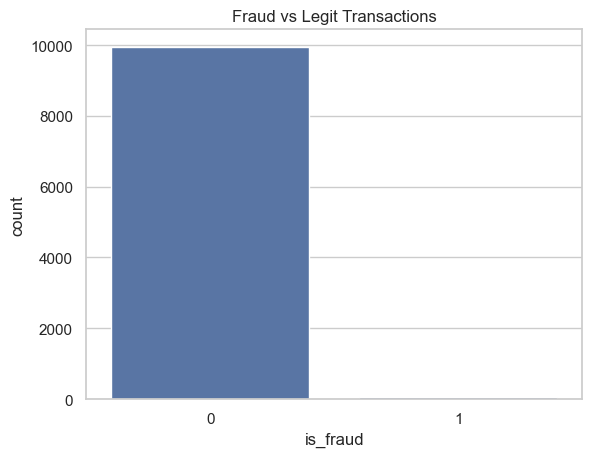

In [19]:
#STEP 12: Visualization (Alternative, Cleaner)
plot_df = train.sample(min(10000, len(train)), random_state=42)

sns.countplot(x='is_fraud', data=plot_df)
plt.title("Fraud vs Legit Transactions")
plt.show()


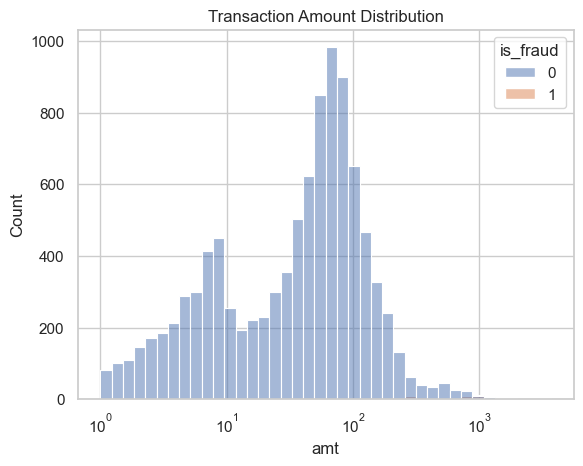

In [20]:
#Amount Distribution
sns.histplot(
    plot_df,
    x='amt',
    hue='is_fraud',
    bins=40,
    log_scale=True
)
plt.title("Transaction Amount Distribution")
plt.show()


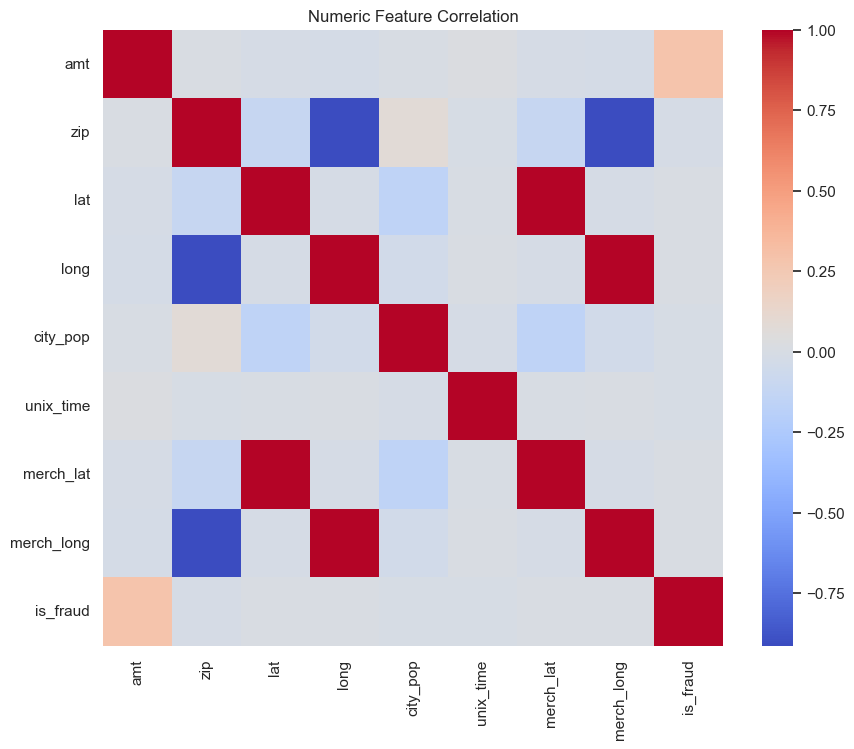

In [21]:
#Correlation Heatmap
corr = plot_df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Numeric Feature Correlation")
plt.show()


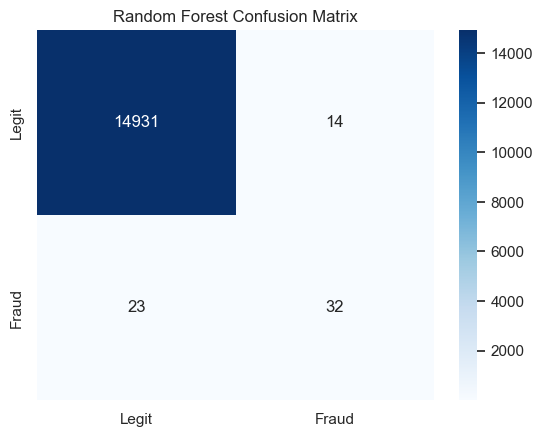

In [22]:
#Confusion Matrix (RF)
cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Legit','Fraud'],
    yticklabels=['Legit','Fraud']
)
plt.title("Random Forest Confusion Matrix")
plt.show()


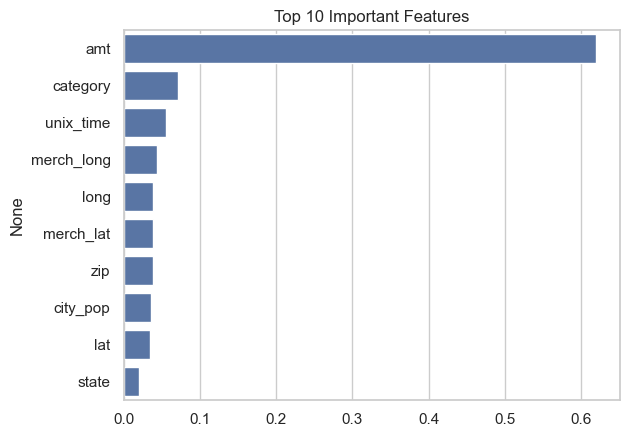

In [23]:
#Feature Importance (Top 10)
importances = rf_model.feature_importances_
features = X_train.columns

top_features = (
    pd.Series(importances, index=features)
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
#task 2 :Report

In [ ]:
#  Credit Card Fraud Detection using Machine Learning  
**CODSOFT Internship – Machine Learning Task 2**

---

##  1. Introduction

Credit card fraud has become a major concern in the financial sector due to the rapid growth of online and digital transactions. Fraudulent transactions cause significant financial losses and reduce customer trust.

This project focuses on building a **machine learning–based fraud detection system** that can accurately classify transactions as **fraudulent** or **legitimate** using transaction, customer, and location-related features.

---

##  2. Objective

The main objectives of this project are:

- To preprocess and clean transaction data
- To handle high-dimensional and categorical features efficiently
- To build multiple machine learning models for fraud detection
- To compare model performance and select the best one
- To evaluate results using standard classification metrics

---

##  3. Dataset Description

The dataset consists of credit card transaction records with the following key attributes:

| Feature | Description |
|-------|-------------|
| `amt` | Transaction amount |
| `category` | Transaction category |
| `gender` | Gender of the card holder |
| `city_pop` | Population of the city |
| `lat`, `long` | Card holder location |
| `merch_lat`, `merch_long` | Merchant location |
| `job` | Card holder occupation |
| `is_fraud` | Target variable (0 = Legit, 1 = Fraud) |

The dataset also includes identifiers and timestamps, which were removed during preprocessing.

---

##  4. Data Preprocessing

The following preprocessing steps were applied:

- Removed unnecessary columns such as IDs, names, timestamps, and card numbers
- Sampled the dataset to avoid memory issues
- Dropped high-cardinality categorical columns that could cause encoding problems
- Handled categorical features using **Ordinal Encoding**
- Separated features and target variable

These steps ensured efficient memory usage and clean input data.

---

##  5. Handling Class Imbalance

The dataset is highly **imbalanced**, with fraudulent transactions being much fewer than legitimate ones.  
To address this issue:

- Class weights were applied in some models
- Evaluation was done using metrics beyond accuracy (Precision, Recall, F1-score)

---

##  6. Machine Learning Models Used

The following models were trained and evaluated:

###  Logistic Regression
- Simple and interpretable baseline model
- Performed well with balanced class weights

###  Decision Tree Classifier
- Captures non-linear relationships
- Controlled depth to avoid overfitting

###  Random Forest Classifier
- Ensemble model combining multiple decision trees
- Provided the best overall performance
- Selected as the final model

---

##  7. Model Evaluation

The models were evaluated using:

- **Accuracy Score**
- **Confusion Matrix**
- **Precision, Recall, and F1-score**

The Random Forest model achieved the highest accuracy and better fraud detection capability compared to other models.

---

## 8. Visualization & Analysis

Several visualizations were created to understand the data and model performance:

- **Class Distribution Plot** (Fraud vs Legitimate)
- **Transaction Amount Distribution**
- **Correlation Heatmap** for numeric features
- **Confusion Matrix Heatmap**
- **Feature Importance Plot** (Top contributing features)

These visualizations helped interpret model behavior and identify important patterns.

---

##  9. Feature Importance

Using the Random Forest model, the most important features contributing to fraud detection were identified, such as:

- Transaction amount (`amt`)
- Location-based features
- City population
- Transaction category

This analysis provides insights into factors that influence fraudulent behavior.

---

##  10. Results & Conclusion

In this project, a complete credit card fraud detection pipeline was successfully implemented.  
Among all models tested, **Random Forest** performed the best in terms of accuracy and robustness.

### Key Takeaways:
- Proper preprocessing is crucial for large datasets
- Handling categorical and high-cardinality features improves stability
- Ensemble models perform better for complex fraud patterns
- Accuracy alone is not sufficient for imbalanced datasets

---

##  11. Future Improvements

- Apply advanced imbalance techniques like **SMOTE**
- Use **XGBoost or LightGBM** for better performance
- Include time-based feature engineering
- Optimize hyperparameters using Grid Search
- Deploy the model as a real-time fraud detection system

---

##  Project Completed as Part of  
**CODSOFT – Machine Learning Internship**
